In [1]:
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa

In [2]:
# Read the audio file.
audio_file = 'S2L_170401_Pepperwood_Chapperal-2017-04-01_10-20.wav'

# Read the audio file.
x, sample_rate = librosa.load(audio_file,sr=None)

In [3]:
x.size
sample_rate

length = x.size
print('audio is sampled at '+str(sample_rate)+'Hz and has length '+str(length/sample_rate)+' seconds')

length_seconds = length / sample_rate;


audio is sampled at 44100Hz and has length 60.25 seconds


In [4]:
# Play the clip.
ipd.Audio(x, rate=sample_rate)

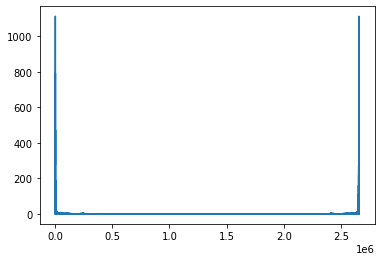

In [5]:
# Compute the 1D DFT
f = np.fft.fft(x)

# Plot the 1D DFT
plt.plot(abs(f))

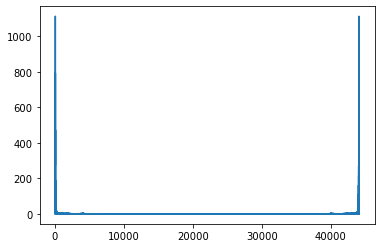

In [6]:
# Now with correctly labeled frequency axis.
f_axis = np.linspace(0, sample_rate, length, endpoint=False)
plt.plot(f_axis, abs(f))

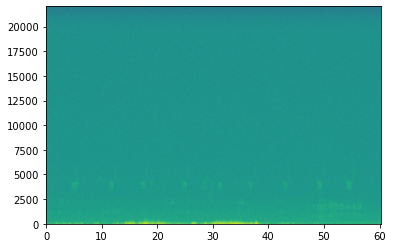

In [7]:
# Compute spectrogram.
spectrogram, freqs, bins, im = plt.specgram(x, NFFT=1024, Fs=sample_rate, noverlap=0)

In [8]:
print(spectrogram.ndim)
print(spectrogram.shape)

2
(513, 2594)


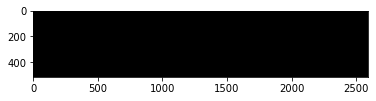

In [9]:
# Display spectrogram as a grayscale image.
plt.imshow(spectrogram,cmap='gray')

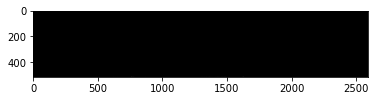

In [10]:
# Flip it vertically.
spectrogram = np.flip(spectrogram, 0)
plt.imshow(spectrogram,cmap='gray')


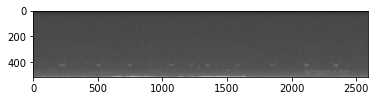

In [11]:
# Compute log_10 of spectrogram. Add eps to make sure don't take log of 0.
spectrogram_log = np.log10( spectrogram + np.finfo(float).eps)
plt.imshow(spectrogram_log,cmap='gray')

In [12]:
# Normalize so values range from 0 to 1.
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))
spectrogram_log = (spectrogram_log - np.amin(spectrogram_log)) / (np.amax(spectrogram_log) - np.amin(spectrogram_log))
print(np.amin(spectrogram_log))
print(np.amax(spectrogram_log))

-15.653558120029976
-3.8116270551857494
0.0
1.0


In [13]:
plt.imsave('spect.png', spectrogram_log, cmap='gray')